In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer

In [2]:
songs = pd.read_csv('data.csv')

In [3]:
songs.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,174389.000000,174389,174389.000000,1.743890e+05,174389.000000,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000
unique,NaN,36195,NaN,NaN,NaN,NaN,172230,NaN,NaN,NaN,NaN,NaN,137013,NaN,11043,NaN,NaN,NaN,NaN
top,NaN,['Tadeusz Dolega Mostowicz'],NaN,NaN,NaN,NaN,1xQvPFljQXA3GCK869ERvC,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1281,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,103,NaN,1447,NaN,NaN,NaN,NaN
mean,0.499228,NaN,0.536758,2.328100e+05,0.482721,0.068135,NaN,0.197252,5.205305,0.211123,-11.750865,0.702384,NaN,25.693381,NaN,0.105729,117.006500,0.524533,1977.061764
std,0.379936,NaN,0.176025,1.483958e+05,0.272685,0.251978,NaN,0.334574,3.518292,0.180493,5.691591,0.457211,NaN,21.872740,NaN,0.182260,30.254178,0.264477,26.907950
min,0.000000,NaN,0.000000,4.937000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,NaN,0.414000,1.661330e+05,0.249000,0.000000,NaN,0.000000,2.000000,0.099200,-14.908000,0.000000,NaN,1.000000,NaN,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,NaN,0.548000,2.057870e+05,0.465000,0.000000,NaN,0.000524,5.000000,0.138000,-10.836000,1.000000,NaN,25.000000,NaN,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,NaN,0.669000,2.657200e+05,0.711000,0.000000,NaN,0.252000,8.000000,0.270000,-7.499000,1.000000,NaN,42.000000,NaN,0.076300,135.011000,0.743000,1999.000000


In [4]:
songs.shape

(174389, 19)

In [5]:
songs.nunique()

acousticness          4929
artists              36195
danceability          1233
duration_ms          56306
energy                2306
explicit                 2
id                  172230
instrumentalness      5400
key                     12
liveness              1740
loudness             25580
mode                     2
name                137013
popularity              98
release_date         11043
speechiness           1633
tempo                84123
valence               1707
year                   102
dtype: int64

In [6]:
songs.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [7]:
songs[songs.duplicated()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9525,0.56700,['Neil Diamond'],0.515,180253,0.6410,0,1BmVQ5RGqqtF5cnsv6cQYu,0.064200,5,0.3220,-5.573,1,"Girl, You'll Be A Woman Soon",60,1968,0.0272,109.558,0.655,1968
9534,0.02710,['Neil Diamond'],0.560,163907,0.8270,0,2SS3WeSe24ZqTlTSK4KzQZ,0.002850,8,0.0551,-4.157,1,Cherry Cherry,54,1968,0.0306,84.383,0.904,1968
16113,0.97400,"['Johann Strauss II', 'Riccardo Muti', 'Wiener...",0.219,459053,0.0855,0,5zZbXSRIFe1uWNmEM7f2XI,0.922000,0,0.3550,-19.703,0,"Frühlingsstimmen, Walzer, Op. 410",34,2021-01-08,0.0404,171.849,0.156,2021
16663,0.35500,"['Waylon Jennings', 'Willie Nelson']",0.626,184267,0.4570,0,0sFq478LIo9BFwf2qzMzzF,0.000009,4,0.0668,-13.785,1,The Year 2003 Minus 25 - Remastered,43,1978-01-01,0.0384,102.166,0.474,1978
16669,0.20200,['Ten Years After'],0.384,224133,0.5160,0,19HjHUjCfDrEYhVSIKG6nK,0.180000,9,0.1140,-12.032,0,I'd Love to Change the World - 2004 Remaster,60,1971-11-11,0.0345,118.129,0.371,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.2310,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.2530,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.8660,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174386,0.80600,['Roger Fly'],0.671,218147,0.5890,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


In [8]:
songs = songs.drop_duplicates()

In [9]:
# songs more than 10 minutes not considered/dropped
songs = songs.drop(songs[songs['duration_ms']>=600000].index.values)

In [10]:
songs.shape
#songs.describe(include='all')

(169696, 19)

-------------------------------------------------------------------------------------------------------------------------------

# EDA

### Distributions

#### Histograms

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

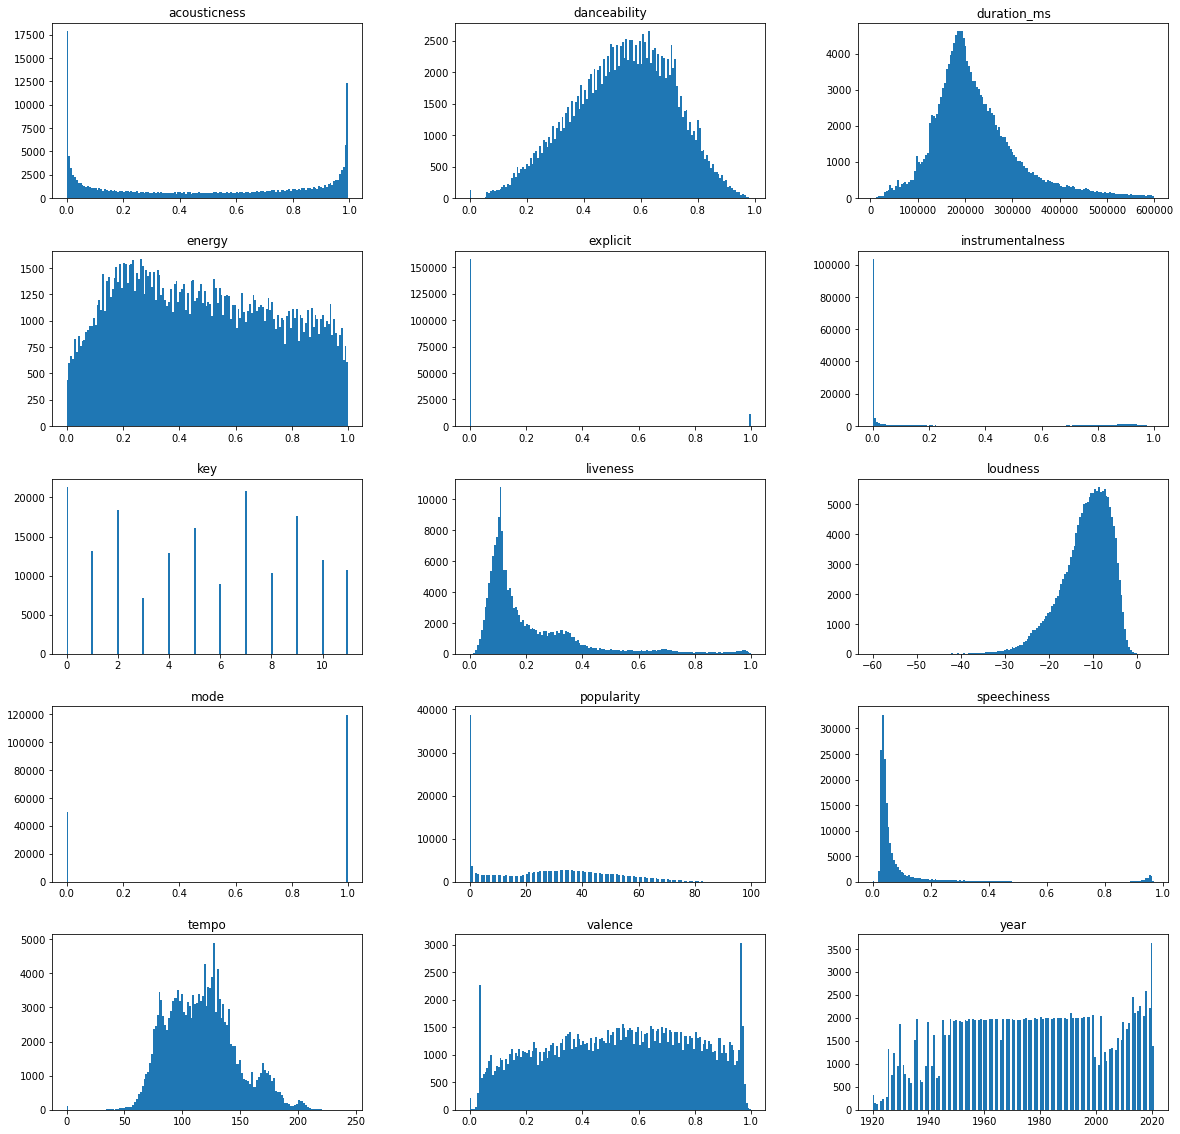

In [11]:
songs.hist( figsize = (20,20), grid = False, bins = 150, layout = (5,3))

<AxesSubplot:>

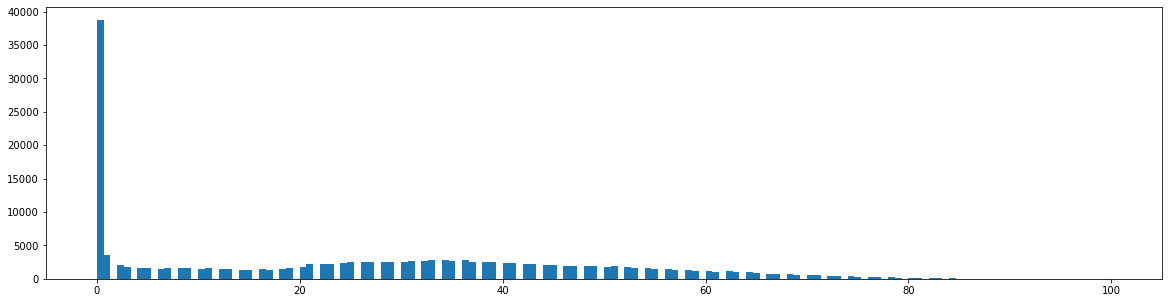

In [12]:
songs['popularity'].hist( figsize = (20,5), grid = False, bins = 150)

#### Boxplots

<AxesSubplot:>

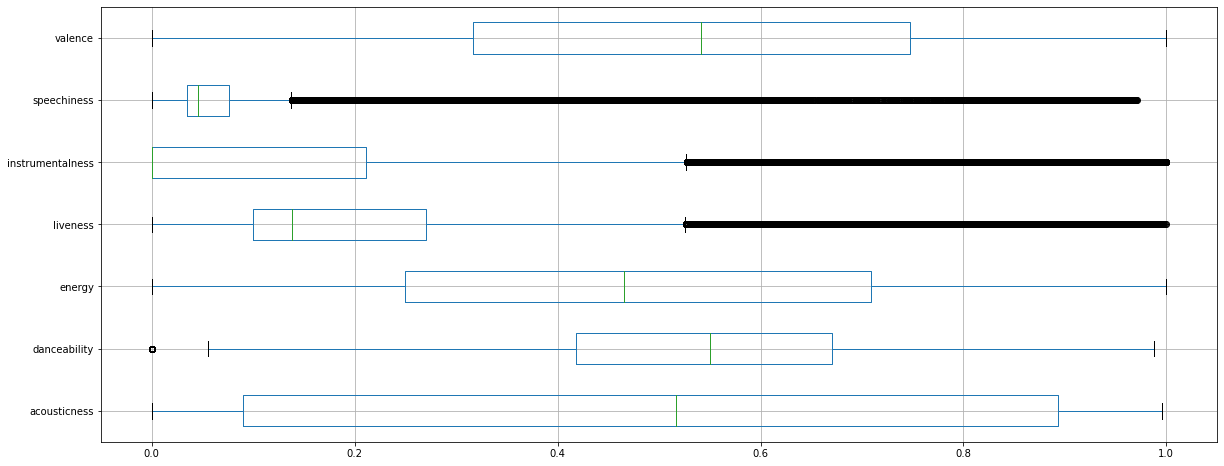

In [13]:
songs.boxplot(column = ['acousticness', 'danceability', 'energy', 'liveness', 'instrumentalness', 
                        'speechiness', 'valence'], 
              figsize = (20,8), vert = 0)

<AxesSubplot:>

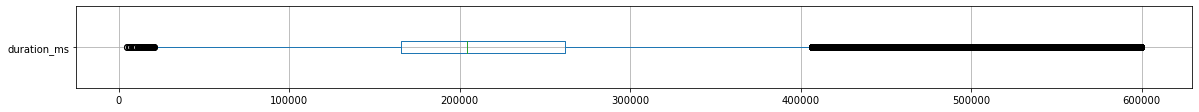

In [14]:
songs.boxplot(column = ['duration_ms'], 
              figsize = (20,1.5), vert = 0)

<AxesSubplot:>

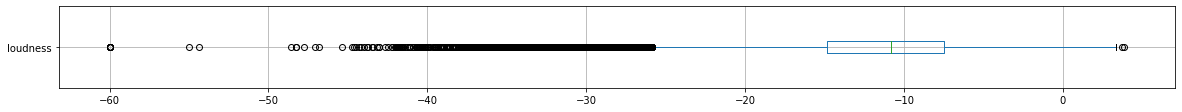

In [15]:
songs.boxplot(column = ['loudness'], 
              figsize = (20,1.5), vert = 0)

<AxesSubplot:>

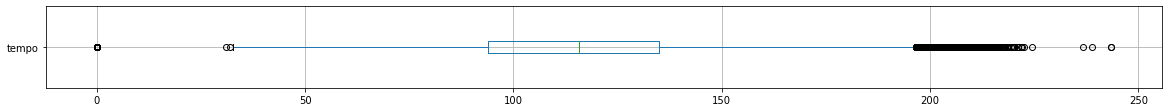

In [16]:
songs.boxplot(column = ['tempo'], 
              figsize = (20,1.5), vert = 0)

<AxesSubplot:>

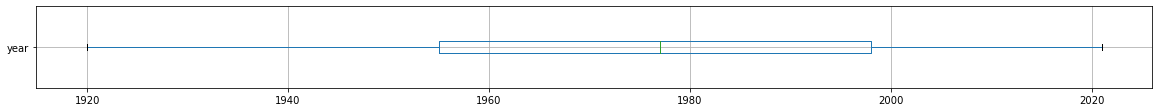

In [17]:
songs.boxplot(column = ['year'], 
              figsize = (20,1.5), vert = 0)

<AxesSubplot:>

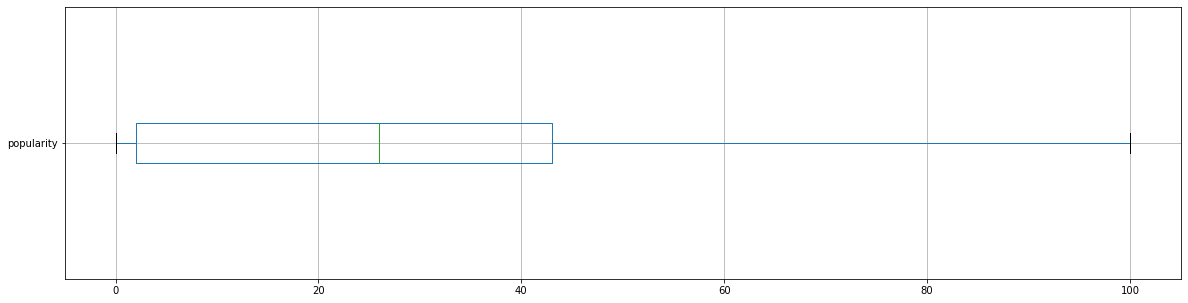

In [18]:
songs.boxplot(column = ['popularity'], 
              figsize = (20,5), vert = 0)

### Scatter plots

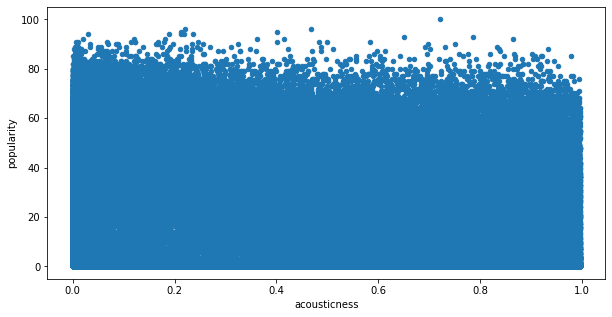

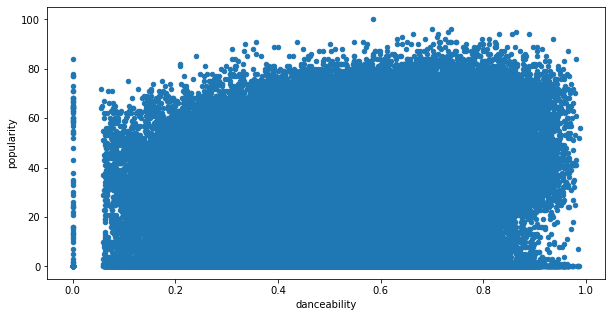

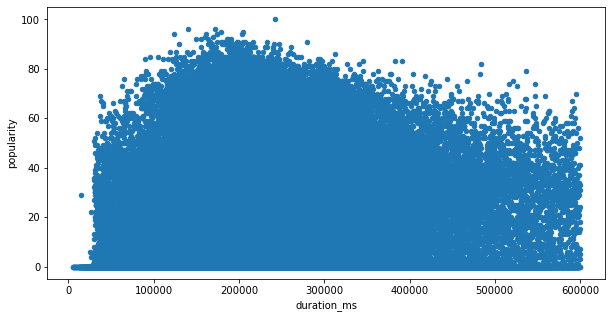

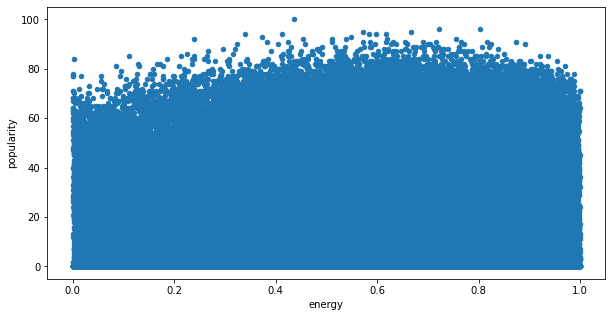

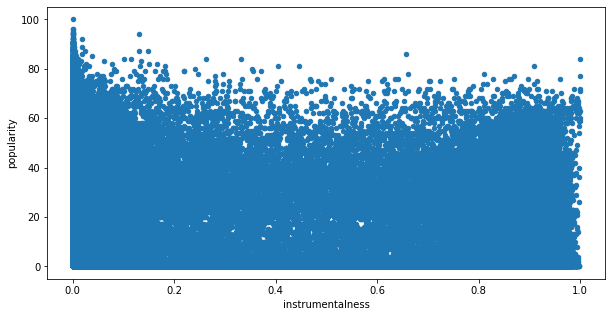

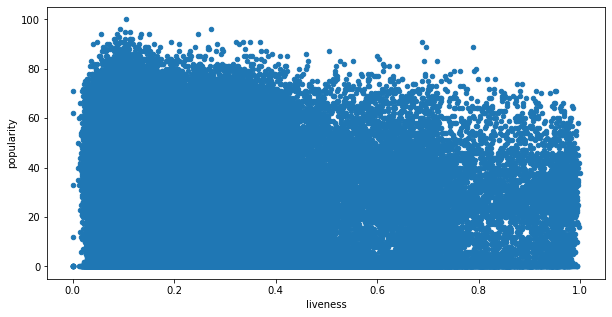

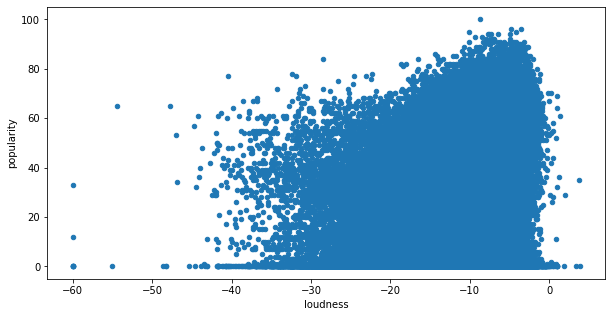

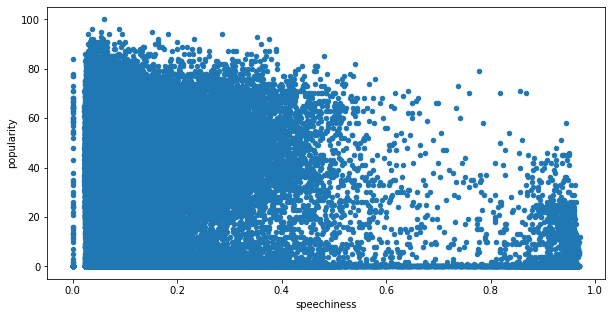

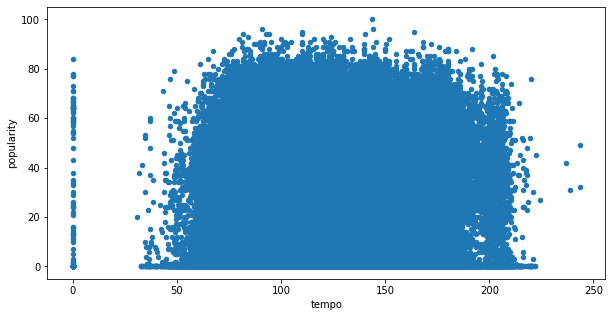

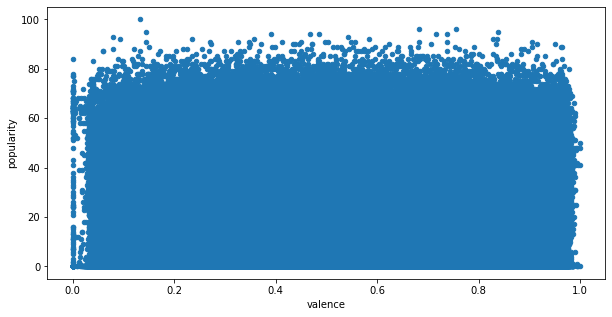

In [19]:
for i in songs.columns:
    if i not in ['artists','id','name','release_date','year','popularity','mode','key','explicit']:
        songs.plot.scatter(x = i, y = 'popularity', figsize = (10,5), grid = False)

### Lineplots / Time series 

Text(0.5, 0, 'Year')

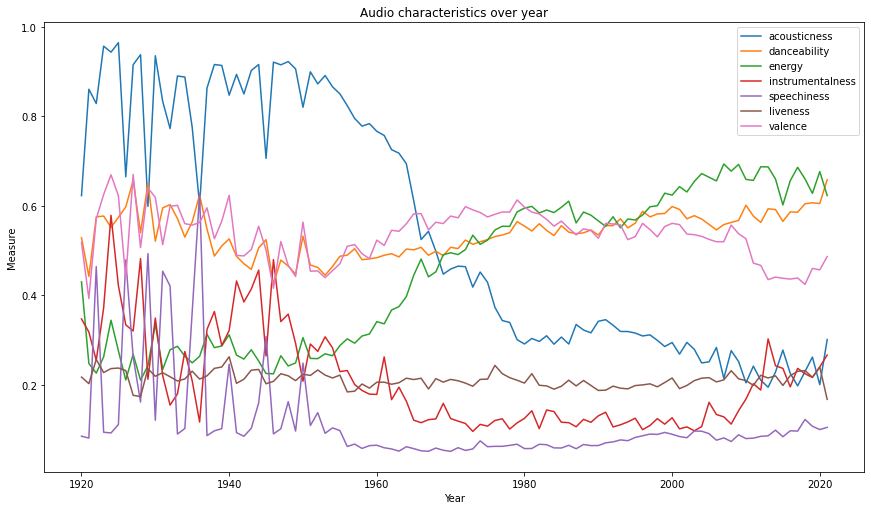

In [20]:
plt.figure(figsize=(14.70, 8.27))
columns = ["acousticness","danceability","energy",'instrumentalness',"speechiness","liveness","valence"]
for col in columns:
    x = songs.groupby("year")[col].mean()
    ax = sns.lineplot(x = x.index, y = x, label = col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

<AxesSubplot:xlabel='year', ylabel='popularity'>

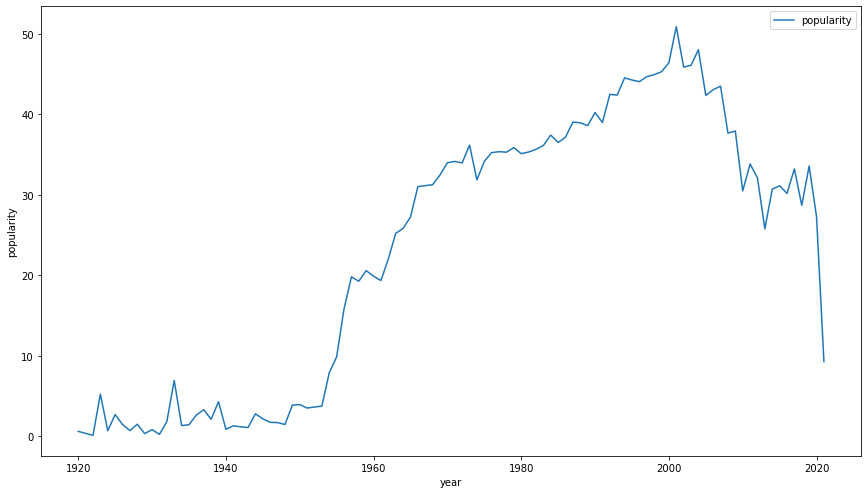

In [21]:
plt.figure(figsize=(14.70, 8.27))
x = songs.groupby('year')['popularity'].mean()
sns.lineplot(x = x.index, y = x, label = 'popularity')

<AxesSubplot:xlabel='year', ylabel='loudness'>

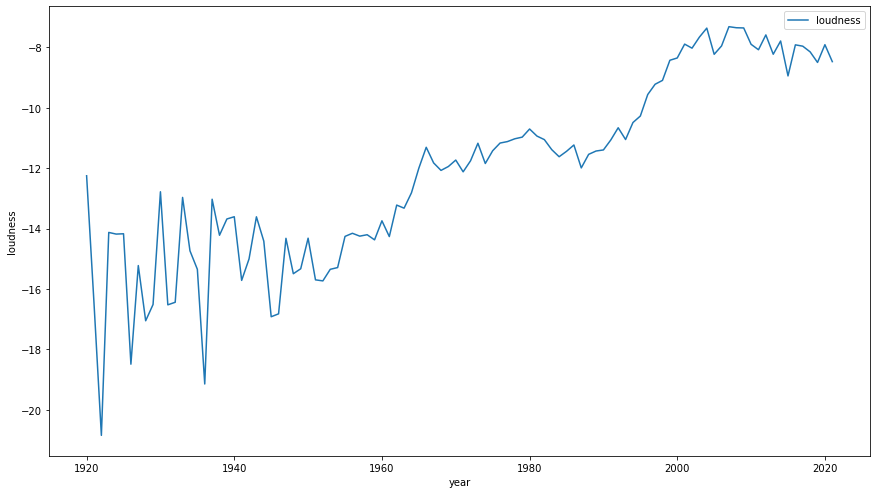

In [22]:
plt.figure(figsize=(14.70, 8.27))
x = songs.groupby('year')['loudness'].mean()
sns.lineplot(x = x.index, y = x, label = 'loudness')

<AxesSubplot:xlabel='year', ylabel='duration_ms'>

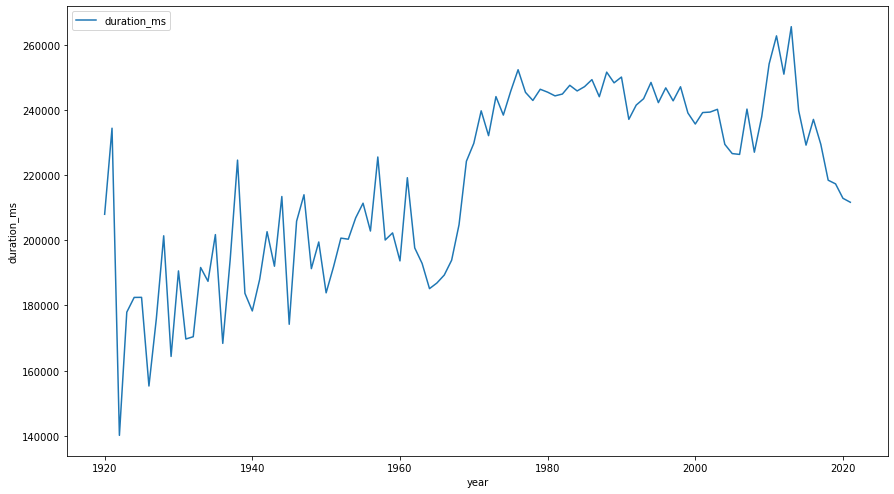

In [23]:
plt.figure(figsize=(14.70, 8.27))
x = songs.groupby('year')['duration_ms'].mean()
sns.lineplot(x = x.index, y = x, label = 'duration_ms')

<AxesSubplot:xlabel='year', ylabel='tempo'>

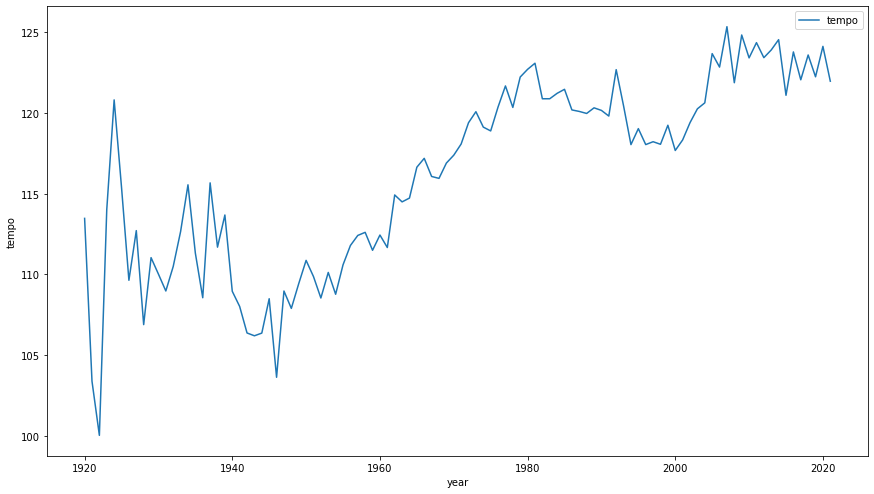

In [24]:
plt.figure(figsize=(14.70, 8.27))
x = songs.groupby('year')['tempo'].mean()
sns.lineplot(x = x.index, y = x, label = 'tempo')

### Popularity of artists

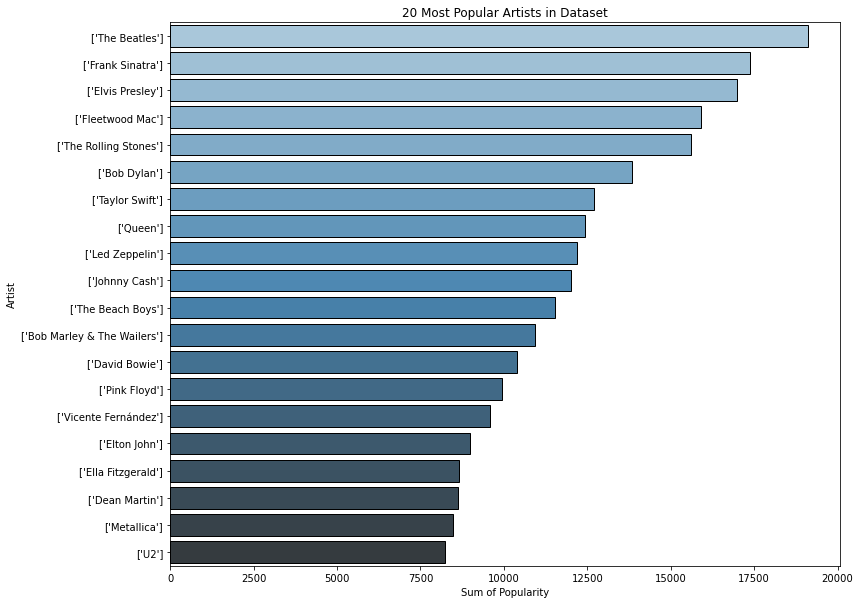

In [25]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = songs.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues_d", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity')
ax.set_ylabel('Artist')
ax.set_title('20 Most Popular Artists in Dataset')
plt.show()

### Songs in each decade

C:\Users\Saksham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='decade', ylabel='count'>

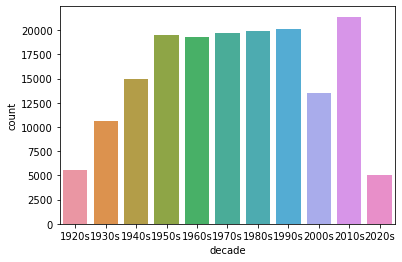

In [26]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

songs['decade'] = songs['year'].apply(get_decade)
sns.countplot(songs['decade'].sort_values())

### Popularity vs Explicit

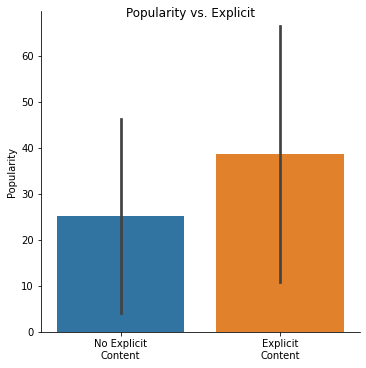

In [27]:
exp_data = sns.catplot(data=songs, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", 
                        height=5)
exp_data.fig.suptitle('Popularity vs. Explicit')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

### Distribution of Keys

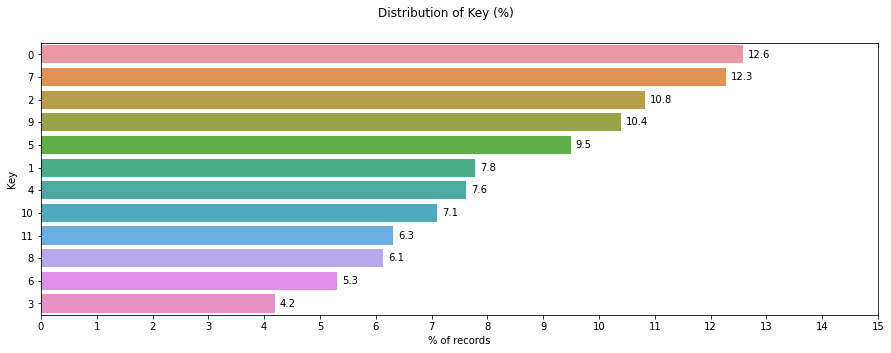

In [28]:
fig, ax = plt.subplots(figsize = (15, 5))
key_data = songs['key'].value_counts(normalize=True, sort=True, ascending=True)*100
y_ticks = songs['key'].value_counts().index
ax = sns.barplot(x = key_data.values, y= y_ticks, data = key_data, orient='h')
ax.set_xlabel('% of records')
ax.set_ylabel('Key')
ax.set_xlim(0.0,15.0, 0)
ax.set_xticks(ticks=range(0,16,1))
ax.set_yticklabels(labels=y_ticks) 
rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    label = f'{x_value:.1f}'
    plt.annotate(
        label,              
        (x_value, y_value), 
        xytext=(space, 0),  
        textcoords="offset points",
        va='center',               
        ha=ha)                     

plt.suptitle('Distribution of Key (%)')
plt.show()

### Popularity by keys

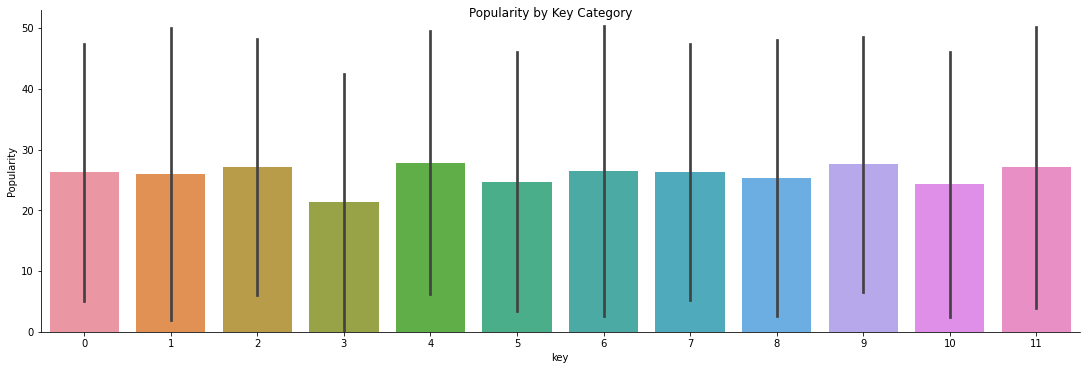

In [29]:
exp_data = sns.catplot(data=songs, kind="bar",
                        x="key", y="popularity",
                        ci = 'sd',
                        height=5, aspect = 3)
exp_data.fig.suptitle('Popularity by Key Category')
exp_data.set_axis_labels("key", "Popularity")
plt.show()

### Pearson Correlation Matrix

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

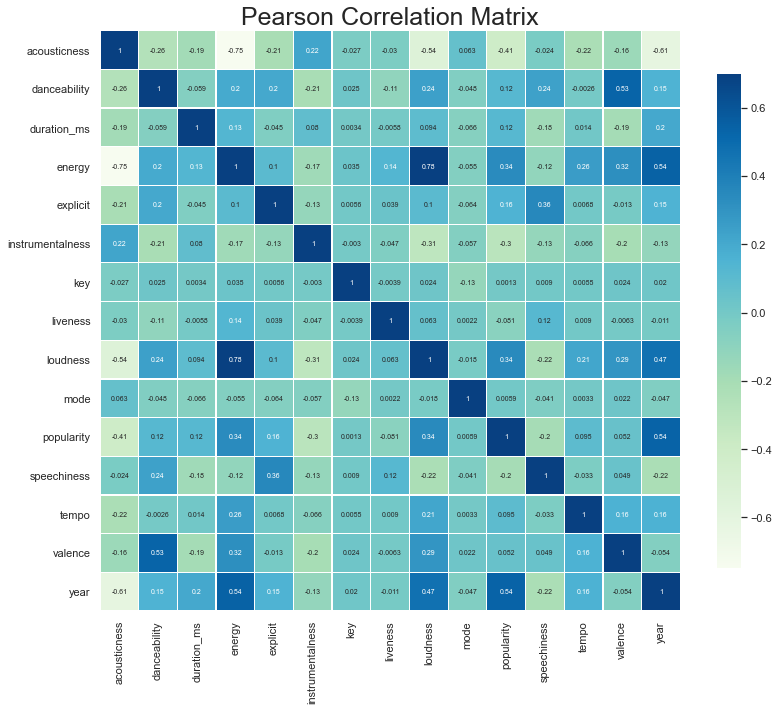

In [30]:
#Correlation matrix.
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(songs.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [31]:
songs.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.541223
loudness            0.343826
energy              0.338262
explicit            0.155417
danceability        0.122649
duration_ms         0.118864
tempo               0.095341
valence             0.052452
mode                0.005909
key                 0.001269
liveness           -0.080955
speechiness        -0.198827
instrumentalness   -0.295060
acousticness       -0.407056
Name: popularity, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

# Target and predictors

In [32]:
songs.columns.values

array(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'valence', 'year', 'decade'], dtype=object)

In [33]:
#  dropped columns
#  artists, id, mode(key addresses it), name, release_date

x = songs[['acousticness','danceability','duration_ms','energy','explicit',
           'instrumentalness','key','liveness','loudness', 'mode',
           'speechiness','tempo','valence','year']]
y = songs[['popularity']]

In [34]:
x_cat = x[['explicit','key','mode','year']]
x_num = x[['acousticness','danceability','duration_ms','energy',
           'instrumentalness','liveness','loudness','speechiness',
           'tempo','valence']]
scaler = StandardScaler()
scaler.fit(x_num)
x_num_std = scaler.transform(x_num)
x_num_std = pd.DataFrame(index=x_num.index.values, columns = x_num.columns, data = x_num_std)
x_std = pd.concat([x_num_std,x_cat], axis = 1)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 13)
x_std_train,x_std_test,y_train,y_test = train_test_split(x_std, y, test_size = 0.3, random_state = 13)

In [36]:
#x_std.shape
#x_train.shape
#y_train.shape
#x_test.shape
#y_test.shape
#x_std_train.shape
#y_train.shape
#x_std_test.shape
#y_test.shape


-------------------------------------------------------------------------------------------------------------------------------

# Feature engineering

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

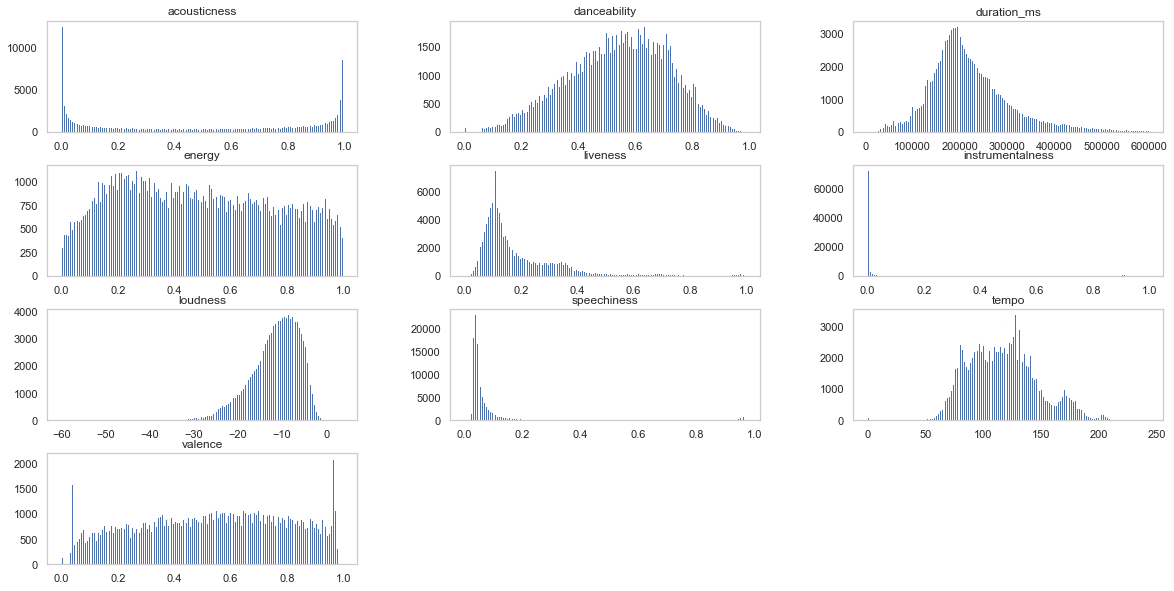

In [37]:
hist_plot_col_list = ['acousticness', 'danceability', 'duration_ms', 'energy', 'liveness', 'instrumentalness'
                      , 'loudness', 'speechiness', 'tempo', 'valence']
x_train.hist(column = hist_plot_col_list, figsize = (20,10), grid = False, bins = 150)

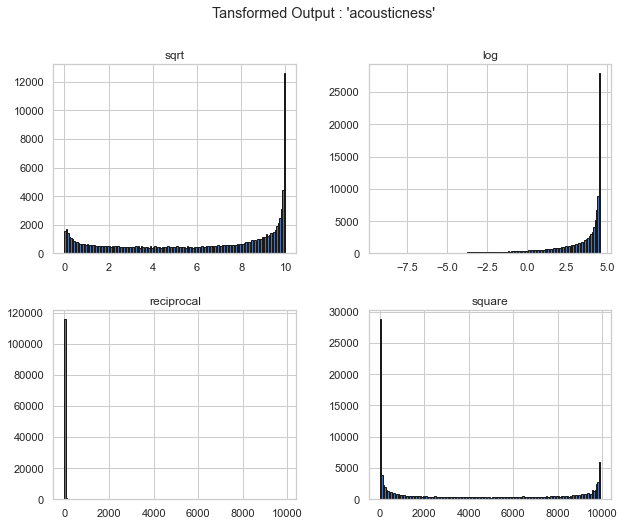

In [38]:
x_train_acousticness = (x_train['acousticness']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_acousticness[np.isfinite(x_train_acousticness)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'acousticness'")
plt.show()

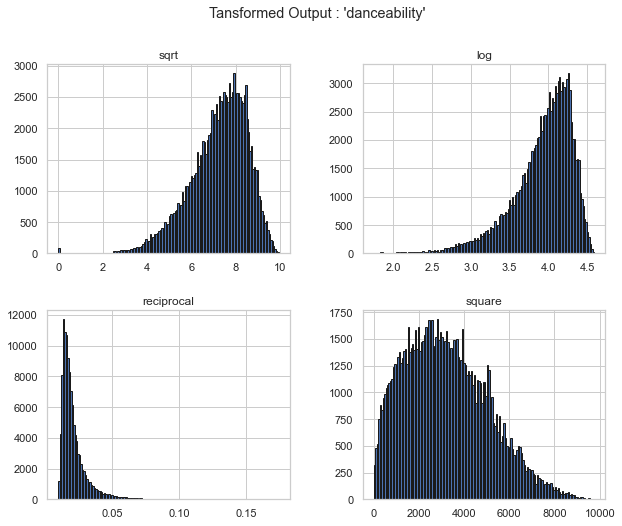

In [39]:
x_train_danceability = (x_train['danceability']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_danceability[np.isfinite(x_train_danceability)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'danceability'")
plt.show()

Danceability : square

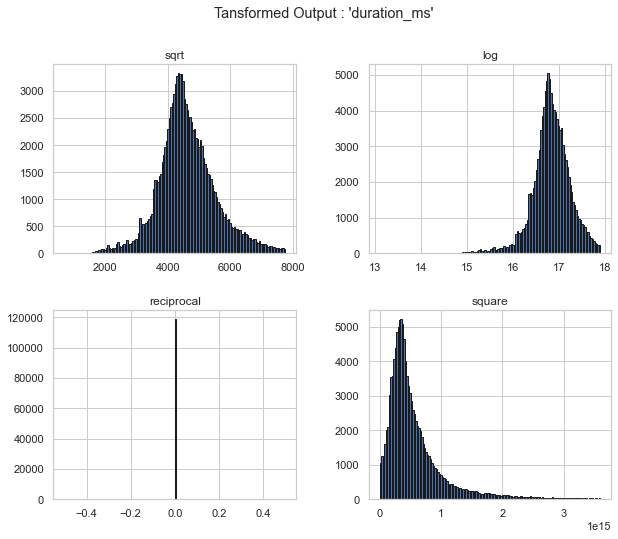

In [40]:
x_train_duration_ms = (x_train['duration_ms']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_duration_ms[np.isfinite(x_train_duration_ms)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'duration_ms'")
plt.show()

duration_ms : sqrt

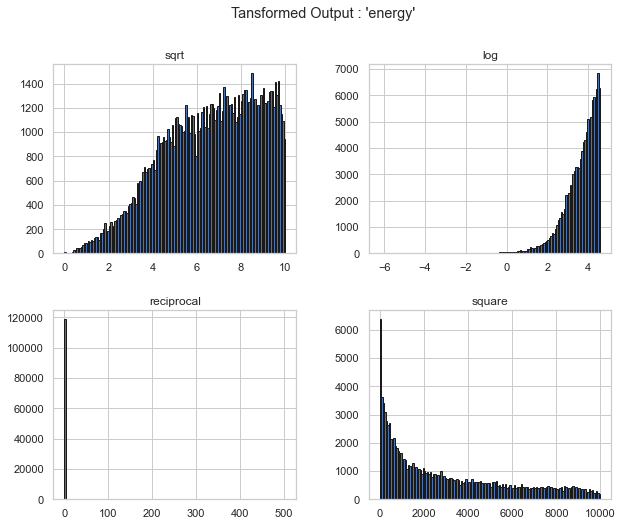

In [41]:
x_train_energy = (x_train['energy']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_energy[np.isfinite(x_train_energy)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'energy'")
plt.show()

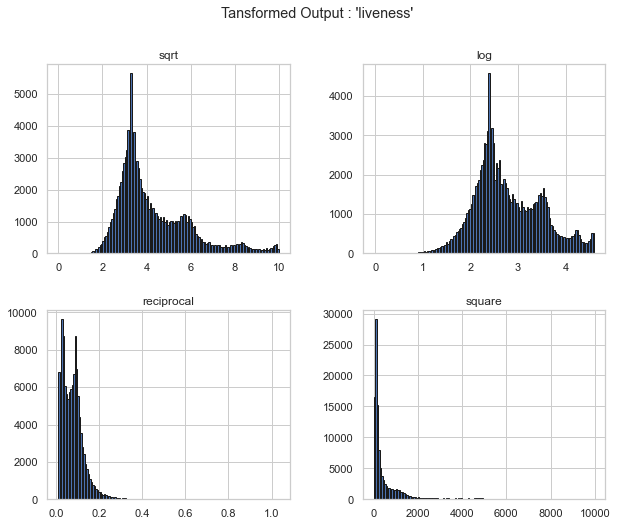

In [42]:
x_train_liveness = (x_train['liveness']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_liveness[np.isfinite(x_train_liveness)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'liveness'")
plt.show()

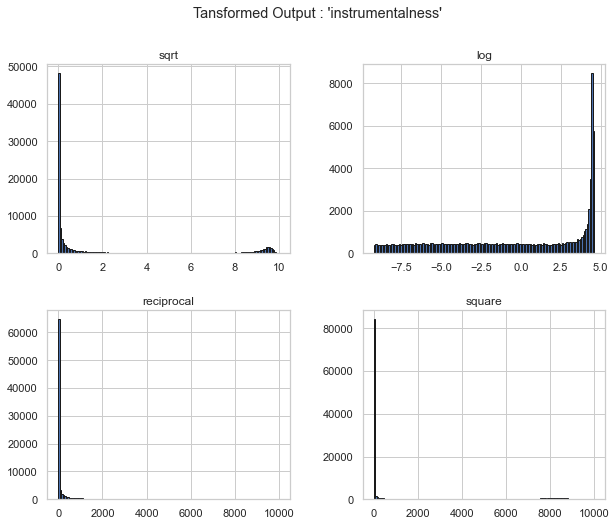

In [43]:
x_train_instrumentalness = (x_train['instrumentalness']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_instrumentalness[np.isfinite(x_train_instrumentalness)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'instrumentalness'")
plt.show()

Instrumentalness important observation

C:\Users\Saksham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


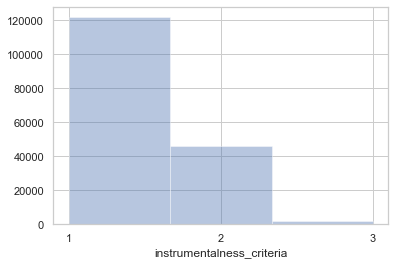

In [46]:
criteria= [songs['instrumentalness'].between(0, 0.1),
           songs['instrumentalness'].between(0.1000001, 0.95),
           songs['instrumentalness'].between(0.950001, 1)]
values = [1, 2, 3]
songs['instrumentalness_criteria'] = np.select(criteria, values, 0)
fig, ax = plt.subplots()
sns.distplot(songs['instrumentalness_criteria'],ax=ax, kde=False, bins=3 )
ax.set_xticks(range(1,4))
plt.show()

Transformation

In [47]:
def instrumentalness_criteria(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(x_train)
instrumentalness_tranformer.transform(x_std_train)
instrumentalness_tranformer.transform(x_test)
instrumentalness_tranformer.transform(x_std_test)

<ipython-input-47-3d76815381e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))


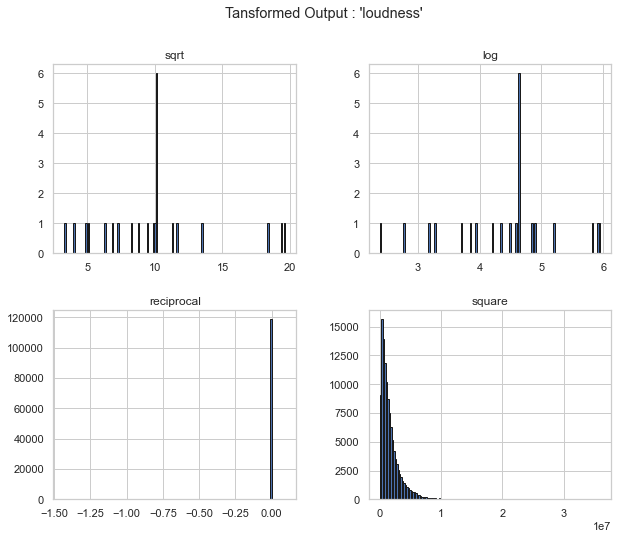

In [48]:
x_train_loudness = (x_train['loudness']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_loudness[np.isfinite(x_train_loudness)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'loudness'")
plt.show()

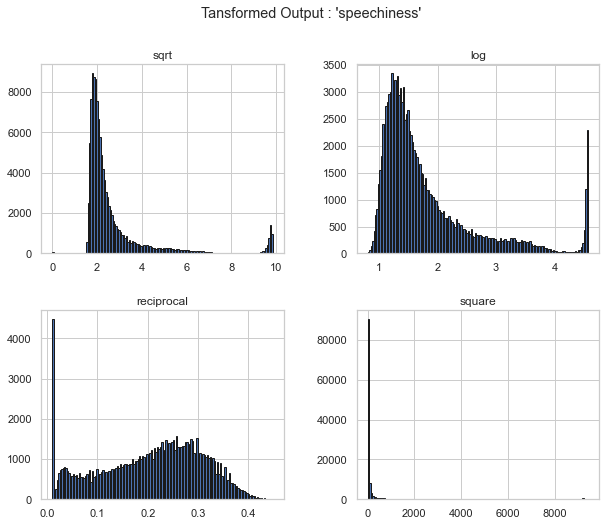

In [49]:
x_train_speechiness = (x_train['speechiness']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_speechiness[np.isfinite(x_train_speechiness)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'speechiness'")
plt.show()

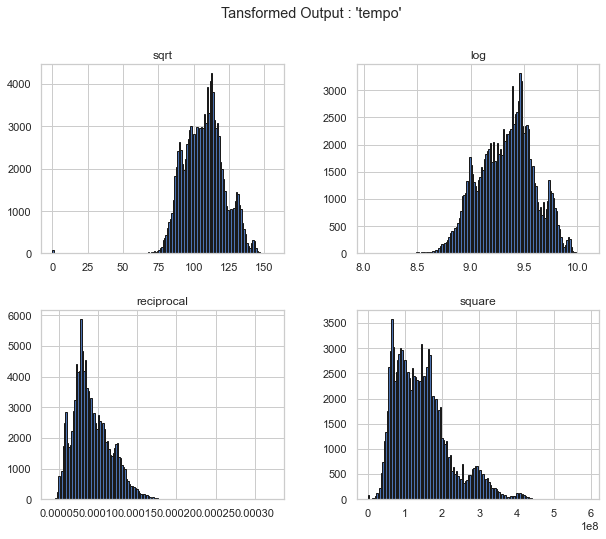

In [50]:
x_train_tempo = (x_train['tempo']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_tempo[np.isfinite(x_train_tempo)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'tempo'")
plt.show()

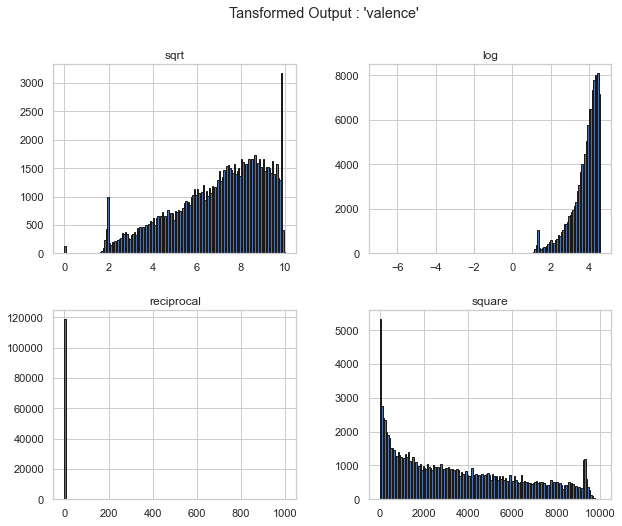

In [51]:
x_train_valence = (x_train['valence']*100).transform([np.sqrt,np.log,np.reciprocal,np.square])
x_train_valence[np.isfinite(x_train_valence)].hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
#x_train_acousticness.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'valence'")
plt.show()

Get dummies or one-hot encoding

In [52]:
x_train_tr = pd.get_dummies(x_train, columns = ['explicit','key','mode','instrumentalness'],drop_first=True)
x_test_tr = pd.get_dummies(x_test, columns = ['explicit','key','mode','instrumentalness'],drop_first=True)
x_std_train_tr = pd.get_dummies(x_std_train, columns = ['explicit','key','mode','instrumentalness'],drop_first=True)
x_std_test_tr = pd.get_dummies(x_std_test, columns = ['explicit','key','mode','instrumentalness'],drop_first=True)

In [53]:
print(x_train.shape)
#print(x_test.shape)
print(x_std_train.shape)
#print(x_std_test.shape)
print(x_train_tr.shape)
#print(x_test_tr.shape)
print(x_std_train_tr.shape)
#print(x_std_test_tr.shape)

(118787, 14)
(118787, 14)
(118787, 25)
(118787, 25)


In [54]:
x_std_train_tr.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'year', 'explicit_1',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'mode_1', 'instrumentalness_2',
       'instrumentalness_3'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------

# Model Selection by forward selection

## Linear Regression

#### Non std non transformed data

In [55]:
lr = SFS(LinearRegression(), k_features = (1,14), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.9s finished

[2021-07-13 22:12:54] Features: 1/14 -- score: 0.2927282236401588[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-13 22:12:55] Features: 2/14 -- score: 0.34018762026813326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend

In [56]:
lr.k_score_

0.3797305149113457

In [57]:
lr.k_feature_names_

('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'year')

All 14 features included in the max r-squared(0.3839) obtained

#### Std non transformed data

In [58]:
lr_std = SFS(LinearRegression(), k_features = (1,14), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x_std_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2021-07-13 22:13:26] Features: 1/14 -- score: 0.2927282236401588[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-13 22:13:27] Features: 2/14 -- score: 0.342815479124568[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend L

In [59]:
lr_std.k_score_

0.38145343737350856

In [60]:
lr_std.k_feature_names_

('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'explicit',
 'key',
 'mode',
 'year')

All 14 features included in the max r-squared(0.3839) obtained and r-squared didnt change by standardizing the data

#### std transformed data

In [61]:
lr_std_tr = SFS(LinearRegression(), k_features = (1,25), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x_std_train_tr,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2021-07-13 22:13:59] Features: 1/25 -- score: 0.2927282236401588[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-13 22:14:00] Features: 2/25 -- score: 0.3381135521656375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend 

[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    3.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    5.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.4s finished

[2021-07-13 22:15:15] Features: 17/25 -- score: 0.38179925376308904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    6.0s remaining:    3.2s
[Para

In [62]:
lr_std_tr.k_score_

0.3818633505667509

In [63]:
lr_std_tr.k_feature_names_

('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'explicit_1',
 'key_1',
 'key_3',
 'key_6',
 'key_7',
 'key_8',
 'key_10',
 'key_11',
 'mode_1',
 'instrumentalness_2',
 'instrumentalness_3')

not much increase in r-square value(0.3840) even with transformed data

## KNN

#### Non std non transformed data

In [64]:
knn = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,14), forward = True, floating = True,
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  2.8min finished

[2021-07-13 22:21:08] Features: 1/14 -- score: 0.4599518241041771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    6.3s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished

[2021-07-13 22:23:09] Features: 2/14 -- score: 0.5320604466442226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    9.9s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend 

In [65]:
knn.k_score_

0.6151229934559298

In [66]:
knn.k_feature_names_

('acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'year')

9 features gets max r-sqaured value (0.6123) 
 'acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence',
 'year'

#### Std non transformed data

In [67]:
knn_std = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,14), forward = True, floating = True,
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_std_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  2.8min finished

[2021-07-13 22:34:02] Features: 1/14 -- score: 0.4599518241041771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    4.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished

[2021-07-13 22:34:13] Features: 2/14 -- score: 0.5287908849105533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    5.5s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend 

In [68]:
knn_std.k_score_

0.6468459745175551

In [69]:
knn_std.k_feature_names_

('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'explicit',
 'year')

11 features gets max r-squared value (0.6472) 
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'explicit',
 'year'

#### Std transformed data

In [70]:
knn_std_tr = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,25), forward = True, floating = True,
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_std_train_tr,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  9.0min remaining:   47.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.2min finished

[2021-07-13 22:59:05] Features: 1/25 -- score: 0.4599518241041771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   20.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished

[2021-07-13 22:59:27] Features: 2/25 -- score: 0.5287908849105533[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:   16.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend 

[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  1.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.9min finished

[2021-07-13 23:29:37] Features: 14/25 -- score: 0.6433019250998319[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:  1.2min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:  1.3min remaining:   29.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  1.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  3.9min finished

[2021-07-13 23:

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.5min finished

[2021-07-14 01:13:05] Features: 21/25 -- score: 0.638705447377848[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  4.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 472.3min finished

[2021-07-14 09:06:42] Features: 22/25 -- score: 0.6375424801464317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\Saksham\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(

In [81]:
knn_std_tr.k_score_

0.6443403289057386

In [72]:
knn_std_tr.k_feature_names_

('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'explicit_1',
 'instrumentalness_3')

r-square value 0.6472, 11 features 
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'explicit_1'

## Decision Tree

In [73]:
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=85)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
R2_1 = r2_score(y_test, y_pred)
print(R2_1)
RMSE2 = sqrt(mean_squared_error(y_test, y_pred))
print(RMSE2)

0.6191647447670003
13.51140503367411


With non std non transformed data, Max_depth = 15, min_sample_leaf = 85 yeilds best r-squared (0.6183)

### forward selection on decision tree models, **time taking**

In [74]:
#scores = []
#features = []
#for i in range(10):
#    depth = (i+1)*5
#    for j in range(20):
#        leaf = (j+1)*5
#        sfs_f = SFS(DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf), k_features = (1,14), forward = True, 
#                    floating = True, verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_train,y_train)
#        scores.append(sfs_f.k_score_)
#        features.append(sfs_f.k_feature_names_)

In [75]:
#sfs_f.k_score_

In [76]:
#sfs_f.k_feature_names_

9 features yields best r-squared (0.6197) 
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'valence',
 'explicit',
 'mode',
 'year'

## From all the models KNN using standardized and non-transformed training data gives best r-square value, lets check for test data

r-square value 0.6472, 11 features 
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'explicit_1'

In [77]:
model = KNeighborsRegressor(n_neighbors=20)
model.fit(x_std_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [78]:
y_pred = model.predict(x_std_test)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.6219058398520967
13.462692461921014


Gives considerabe r-sqaure value 0.6219 for all features

**Now we select the columns from our earlier model selection results**


In [79]:
model_selected_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                          'loudness', 'speechiness', 'tempo', 'valence', 'year', 'explicit']
model = KNeighborsRegressor(n_neighbors=20)
model.fit(x_std_train[model_selected_columns],y_train)

KNeighborsRegressor(n_neighbors=20)

In [80]:
y_pred = model.predict(x_std_test[model_selected_columns])
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.649521719210576
12.961715809457367


### We can see the r-square has gone up by 4.1%.